In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
df_country = pd.read_json("http://export.ckartisan.com/api/country")
df_country.loc[df_country['name'] == 'Thailand'].to_numpy()[0][5]

'ASEAN'

In [16]:
# df = pd.read_json("http://export.ckartisan.com/api/export-2hs?year_at=2019")
df = pd.read_csv('export_2hs_time.csv')  

# df = df.loc[df['year_at'] == 2019]
df

,id,year_at,exporter,importer,hscode,value
0,1,2001,France,world,1,1098756.0
1,2,2002,France,world,1,1537512.0
2,3,2003,France,world,1,1894178.0
3,4,2004,France,world,1,1962671.0
4,5,2005,France,world,1,2138276.0
...,...,...,...,...,...,...
354842,354843,2014,Andorra,world,12,0.0
354843,354844,2015,Andorra,world,12,0.0
354844,354845,2016,Andorra,world,12,0.0
354845,354846,2017,Andorra,world,12,0.0


In [17]:
df_pivot = pd.pivot_table(df, values='value', index=['exporter','year_at'], columns=['hscode'], aggfunc=np.sum)
df_pivot = df_pivot.fillna(0)
df_pivot

hscode                   1       2        3        4        5        6   \
exporter    year_at                                                       
Afghanistan 2008        0.0     0.0      0.0      0.0      0.0      0.0   
            2009        0.0     0.0      0.0      0.0      0.0      0.0   
            2010        0.0  1025.0      0.0      0.0      0.0      0.0   
            2011        0.0     0.0      0.0      0.0      0.0      0.0   
            2012        0.0     0.0      0.0      0.0      0.0      0.0   
...                     ...     ...      ...      ...      ...      ...   
Zimbabwe    2015     3892.0   251.0  12518.0  12518.0  12518.0  12518.0   
            2016     3083.0   881.0   6979.0   6979.0   6979.0   6979.0   
            2017     2230.0   727.0   7852.0   7852.0   7852.0   7852.0   
            2018      591.0   451.0   6238.0   6238.0   6238.0   6238.0   
            2019     3051.0  1910.0   6530.0   6530.0   6530.0   6530.0   

hscode                    7         8        9        10  ...      90      91  \
exporter    year_at                                       ...                   
Afghanistan 2008         0.0  282039.0   1772.0      0.0  ...     0.0     0.0   
            2009         0.0  204529.0   6888.0     15.0  ...     0.0     0.0   
            2010         0.0  135997.0  16691.0     54.0  ...     0.0     0.0   
            2011         0.0  121542.0   5156.0      0.0  ...     0.0     0.0   
            2012         0.0  124275.0  10712.0     71.0  ...     0.0     0.0   
...                      ...       ...      ...      ...  ...     ...     ...   
Zimbabwe    2015     25036.0   16209.0  23214.0   1906.0  ...  5806.0  5806.0   
            2016     13958.0   18129.0  20683.0   2195.0  ...  4505.0  4505.0   
            2017     15704.0   23155.0  24152.0  10168.0  ...  5723.0  5723.0   
            2018     12476.0   29892.0  28454.0   3303.0  ...  3254.0  3254.0   
            2019     13060.0   33803.0  25825.0   3540.0  ...  4111.0  4111.0   

hscode                   92      93      94      95      96      97      98  \
exporter    year_at                                                           
Afghanistan 2008        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
            2009        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
            2010        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
            2011        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
            2012        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                     ...     ...     ...     ...     ...     ...     ...   
Zimbabwe    2015     5806.0  5806.0  5806.0  5806.0  5806.0  5806.0  5806.0   
            2016     4505.0  4505.0  4505.0  4505.0  4505.0  4505.0  4505.0   
            2017     5723.0  5723.0  5723.0  5723.0  5723.0  5723.0  5723.0   
            2018     3254.0  3254.0  3254.0  3254.0  3254.0  3254.0  3254.0   
            2019     4111.0  4111.0  4111.0  4111.0  4111.0  4111.0  4111.0   

hscode                   99  
exporter    year_at          
Afghanistan 2008        0.0  
            2009        0.0  
            2010        0.0  
            2011        0.0  
            2012        0.0  
...                     ...  
Zimbabwe    2015     5806.0  
            2016     4505.0  
            2017     5723.0  
            2018     3254.0  
            2019     4111.0  

[4039 rows x 98 columns]

In [18]:
df_pivot.isnull().sum().sum()

0

In [19]:
X = df_pivot.to_numpy()
X

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0., 1025.,    0., ...,    0.,    0.,    0.],
       ...,
       [2230.,  727., 7852., ..., 5723., 5723., 5723.],
       [ 591.,  451., 6238., ..., 3254., 3254., 3254.],
       [3051., 1910., 6530., ..., 4111., 4111., 4111.]])

In [20]:
model = TSNE(n_components=2, random_state=0)
U = model.fit_transform(X) 
U


array([[-32.645065 ,  -6.581061 ],
       [-31.938377 ,  -7.0126905],
       [-31.083319 ,  -7.325394 ],
       ...,
       [-12.777292 ,  39.25755  ],
       [-12.766805 ,  38.901585 ],
       [-11.701775 ,  39.333473 ]], dtype=float32)

In [21]:
list(U[:,0])

[-32.645065,
 -31.938377,
 -31.083319,
 -31.017797,
 -30.97153,
 -31.088858,
 -32.362698,
 -32.104908,
 -32.071186,
 -33.781826,
 -33.777397,
 -33.750164,
 -45.36267,
 -44.98194,
 -40.98291,
 -40.952595,
 -40.931114,
 -40.867302,
 -15.351712,
 -15.26829,
 -15.249683,
 -3.7014587,
 -3.3711112,
 -2.8052762,
 11.037389,
 10.446372,
 -3.5120046,
 -3.203639,
 -2.9530923,
 -2.6413503,
 -2.6768196,
 64.96822,
 64.59413,
 67.79803,
 70.85334,
 75.24802,
 75.57945,
 77.101654,
 79.00783,
 75.059525,
 76.783356,
 78.83748,
 78.66437,
 77.8053,
 77.051765,
 71.87816,
 69.74079,
 71.97972,
 74.07034,
 72.053215,
 -42.037827,
 -44.478203,
 -40.45105,
 -48.130455,
 -46.958187,
 -44.544014,
 -45.497448,
 -44.782036,
 -35.41067,
 -43.296707,
 -15.87297,
 -26.388502,
 -30.003767,
 -16.004433,
 -10.971894,
 -10.304931,
 -8.280782,
 -9.123547,
 -8.299359,
 -10.522117,
 -11.392569,
 -11.008397,
 -9.400133,
 -10.978419,
 -10.660155,
 -10.263317,
 -10.772766,
 -9.537313,
 -8.916144,
 -8.775325,
 -10.749763,

In [22]:
type(U)

numpy.ndarray

In [23]:
countries = list(df_pivot.axes[0])
countries

[('Afghanistan', 2008),
 ('Afghanistan', 2009),
 ('Afghanistan', 2010),
 ('Afghanistan', 2011),
 ('Afghanistan', 2012),
 ('Afghanistan', 2013),
 ('Afghanistan', 2014),
 ('Afghanistan', 2015),
 ('Afghanistan', 2016),
 ('Afghanistan', 2017),
 ('Afghanistan', 2018),
 ('Afghanistan', 2019),
 ('Albania', 2001),
 ('Albania', 2002),
 ('Albania', 2003),
 ('Albania', 2004),
 ('Albania', 2005),
 ('Albania', 2006),
 ('Albania', 2007),
 ('Albania', 2008),
 ('Albania', 2009),
 ('Albania', 2010),
 ('Albania', 2011),
 ('Albania', 2012),
 ('Albania', 2013),
 ('Albania', 2014),
 ('Albania', 2015),
 ('Albania', 2016),
 ('Albania', 2017),
 ('Albania', 2018),
 ('Albania', 2019),
 ('Algeria', 2001),
 ('Algeria', 2002),
 ('Algeria', 2003),
 ('Algeria', 2004),
 ('Algeria', 2005),
 ('Algeria', 2006),
 ('Algeria', 2007),
 ('Algeria', 2008),
 ('Algeria', 2009),
 ('Algeria', 2010),
 ('Algeria', 2011),
 ('Algeria', 2012),
 ('Algeria', 2013),
 ('Algeria', 2014),
 ('Algeria', 2015),
 ('Algeria', 2016),
 ('Algeria',

In [24]:
SU = U.astype('U')
SU[:,:-1]


array([['-32.645065'],
       ['-31.938377'],
       ['-31.083319'],
       ...,
       ['-12.777292'],
       ['-12.766805'],
       ['-11.701775']], dtype='<U32')

In [25]:
np.asarray(countries)

array([['Afghanistan', '2008'],
       ['Afghanistan', '2009'],
       ['Afghanistan', '2010'],
       ...,
       ['Zimbabwe', '2017'],
       ['Zimbabwe', '2018'],
       ['Zimbabwe', '2019']], dtype='<U41')

In [26]:
indices = np.array([0, 1])
i = indices - np.arange(len(indices))
SU = np.insert(SU,i,np.asarray(countries),axis=1)
SU

array([['Afghanistan', '2008', '-32.645065', '-6.581061'],
       ['Afghanistan', '2009', '-31.938377', '-7.0126905'],
       ['Afghanistan', '2010', '-31.083319', '-7.325394'],
       ...,
       ['Zimbabwe', '2017', '-12.777292', '39.25755'],
       ['Zimbabwe', '2018', '-12.766805', '38.901585'],
       ['Zimbabwe', '2019', '-11.701775', '39.333473']], dtype='<U32')

In [30]:
# convert array into dataframe 
df_SU = pd.DataFrame(SU) 
  
# save the dataframe as a csv file 
df_SU.to_csv("df_SU.csv",index=False)
df_SU.to_json("df_SU.json",orient="records")

In [15]:
df_SU = pd.read_csv("df_SU.csv")
df_SU.to_numpy()

array([['Afghanistan', 2019, -11.925086, -0.262624],
       ['Albania', 2019, -0.27419066, -1.7318566],
       ['Algeria', 2019, 12.815664, 6.9749517],
       ['American Samoa', 2019, -8.945438, -4.722476],
       ['Andorra', 2019, -7.1674724, -0.8911173],
       ['Angola', 2019, 12.8098, 6.6155562],
       ['Anguilla', 2019, -9.032003, -4.1497936],
       ['Antigua and Barbuda', 2019, -8.364955, -6.171809],
       ['Argentina', 2019, 11.63681, 1.242546],
       ['Armenia', 2019, -6.9018226, -14.326382],
       ['Aruba', 2019, -8.522585, -3.5439234],
       ['Australia', 2019, 15.896015, 7.851227],
       ['Austria', 2019, 10.297558, 12.015458],
       ['Azerbaijan', 2019, 10.412731, 6.421838],
       ['Bahamas', 2019, 0.82116, -6.1913657],
       ['Bahrain', 2019, 7.0448666, 5.742242],
       ['Bangladesh', 2019, 3.2740054, -9.624314],
       ['Barbados', 2019, -5.565129, -8.838422],
       ['Belarus', 2019, 9.707994, 0.61862],
       ['Belgium', 2019, 9.118926, 15.391217],
       ['B

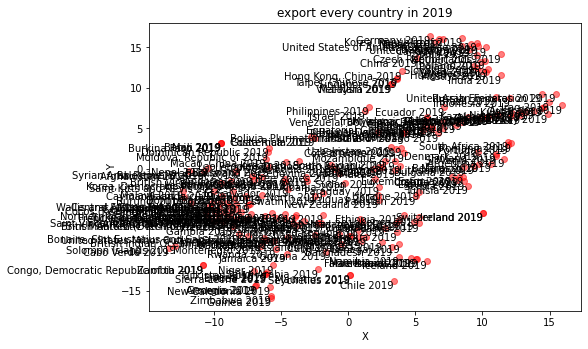

In [22]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
X = list(SU[:,2].astype(float))
Y = list(SU[:,3].astype(float))
C = list(SU[:,0])
t = list(SU[:,1])
ax.scatter(X , Y , color='r', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('export every country in 2019')
for i in range(len(countries)) :
    plt.text(X[i], Y[i], C[i] + " " +str(t[i]), size=10, rotation=0.,
             ha="right", va="top",
             bbox=None
             )


plt.show()